# Assignment 1 - Oil Painting Filter

## Task 1 - Combining Colour Bands

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

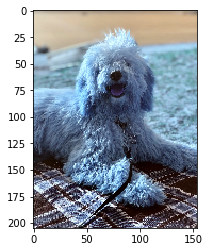

In [2]:
dog_img = cv2.imread("img/dog.jpg")
dog_img = cv2.resize(dog_img,None,fx=0.1,fy=0.1)

plt.imshow(dog_img)

Images are by default BGR.

We want 0.114 B, 0.587 G and 0.299 R.

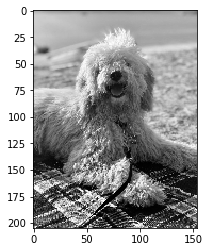

In [3]:
dog_img_gray = dog_img[:,:,0] * 0.114 + dog_img[:,:,1] * 0.587 + dog_img[:,:,2] * 0.299
dog_img_gray = np.array(dog_img_gray, dtype=np.uint8)
plt.imshow(dog_img_gray, cmap='gray', vmin=0, vmax=255)

## Task 2

In [4]:
from collections import Counter

def mode_filter():
    dog = np.copy(dog_img_gray)
    h, w = np.shape(dog)

    radius = 3
    padded_dog = np.pad(dog, radius, mode='wrap')
    print(h, w)

    for row in range(h):
        for col in range(w):
            roi = padded_dog[row:row+2*radius,col:col+2*radius]
            roi = np.reshape(roi, ((2*radius)**2))
            freq = Counter(roi)
            pixel_value = freq.most_common(1)[0][0]
            dog[row, col] = pixel_value.mode[0]

    plt.imshow(dog)

205 154
 

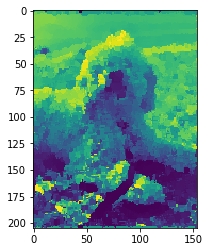

In [5]:
%prun mode_filter()